### Purpose
To run cross correlation analysis on audio samples from the pinyin pronounciation data set and then to visualize the results of the CCA to determine if the results indicate similarity to the human eye. The end goal is to determine if CCA is a useful technique for understanding if the audio samples match each other and to highlight differences when they do not match to give feedback to the pronouncer.

#### Needs
   1.  Open wav files in [python](https://docs.python.org/2/library/wave.html#wave.Wave_read.readframes)
   Wave package supports only uncompressed .wav [files]( https://stackoverflow.com/questions/17297048/opening-a-wave-file-in-python-unknown-format-49-whats-going-wrong)
   2. Return the data in the format that is used by the CCA function. Which is array_like Input [sequences](https://docs.scipy.org/doc/numpy/reference/generated/numpy.frombuffer.html). Have to use int16 as the data type otherwise the float is used and the float numbers end up "failing" to normalize because they are extremely small. The "why" is a gap in my knowledge. 
   3. Pass the data to a CCA [function](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.correlate.html)
   4. Plot the result


In [76]:
import wave
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.pyplot import plot as plot


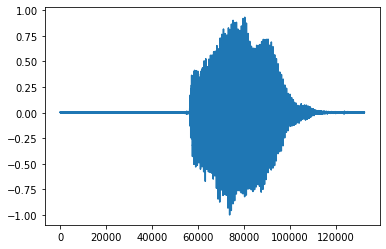

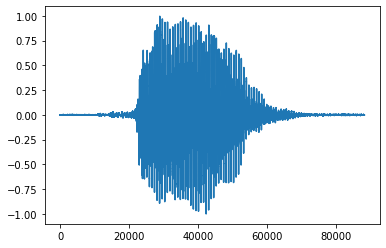

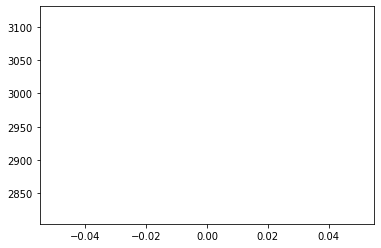

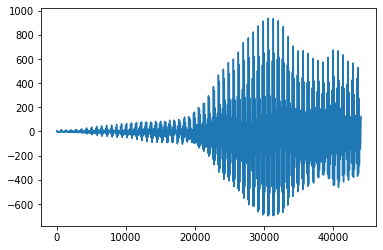

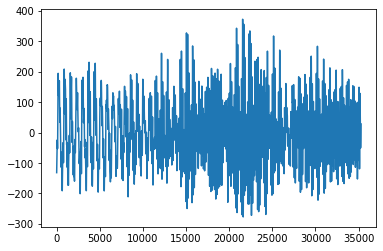

In [78]:
audio_file = []
audio_file.append(wave.open("../Chinese-Pinyin-Audio/Pinyin-Dmitri/uncompressed/ba1_1.wav"))
audio_file.append(wave.open("../Chinese-Pinyin-Audio/Pinyin-Dmitri/uncompressed/ba1_2.wav"))
audio_file.append(wave.open("../Chinese-Pinyin-Audio/Pinyin-Dmitri/uncompressed/ba2_1.wav"))
audio_file.append(wave.open("../Chinese-Pinyin-Audio/Pinyin-Dmitri/uncompressed/ba2_2.wav"))
audio_buf = []
for a in audio_file:
    audio_num = np.frombuffer(a.readframes(a.getnframes()), dtype="int16")
    audio_num = audio_num / np.max(np.abs(audio_num),axis=0)
    audio_buf.append(audio_num)
    
plt.figure()
plt.plot(audio_buf[0])
plt.figure()
plt.plot(audio_buf[1])
cr_same_1 = np.correlate(audio_buf[0], audio_buf[0], mode='valid')
plt.figure()
plt.plot(cr_same_1)
cr_similar_1 = np.correlate(audio_buf[0], audio_buf[1], mode='valid')
plt.figure("similar 0 and 1")
plt.plot(cr_similar_1)
cr_diff_1 = np.correlate(audio_buf[0], audio_buf[2], mode='valid')
plt.figure("different 0 and 2")
plt.plot(cr_diff_1)
cr_diff_2 = np.correlate(audio_buf[0], audio_buf[3], mode='valid')
plt.figure("different 0 and 3")
plt.plot(cr_diff_2)

cr_diff_3 = np.correlate(audio_buf[1], audio_buf[2], mode='valid')
plt.figure("different 1 and 2")
plt.plot(cr_diff_2)